<a href="https://colab.research.google.com/github/NimaZah/Global-Military-Trends/blob/main/rDMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [44]:
# Save the dataframe to csv and downloaded it from colab to the local machine
df.to_csv('ERT.csv')
from google.colab import files
files.download('ERT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/CenterForPeaceAndSecurityStudies/rDMC/main/data/rDMC_raw.csv')


In [9]:
# Print the new variable names

print(df.columns)

Index(['Unnamed: 0', 'year', 'country', 'service', 'subservice',
       'subsubservice', 'equipment_type', 'equipment_subtype',
       'equipment_name', 'equipment_subname', 'unit_name', 'unit_count',
       'continent', 'ccode', 'domain'],
      dtype='object')


In [ ]:
# What is the most popular type of military equipment?
df['equipment_type'].value_counts()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

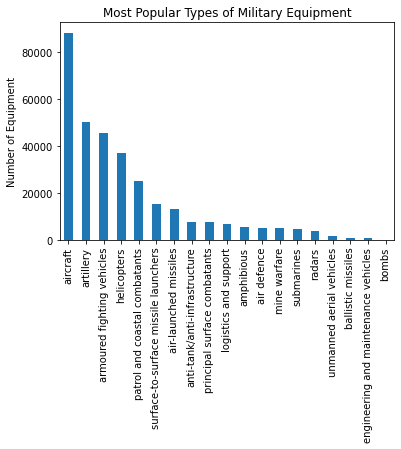

In [18]:
df['equipment_type'].value_counts().plot(kind='bar')
plt.title('Most Popular Types of Military Equipment')
plt.ylabel('Number of Equipment')
plt

In [13]:
# What are the top 10 countries that purchase the most equipment?
df['country'].value_counts().head(10)

us                15950
russia             7330
china              7157
france             6509
india              5744
united kingdom     5323
egypt              5319
thailand           5293
argentina          5288
iran               5109
Name: country, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

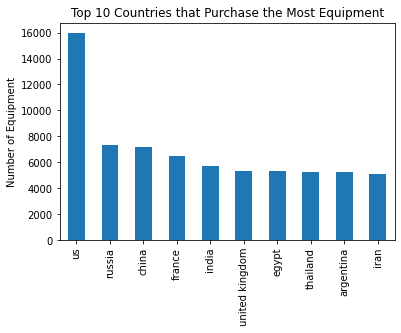

In [19]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries that Purchase the Most Equipment')
plt.ylabel('Number of Equipment')
plt

In [20]:
# What are the top 10 countries that purchase the least equipment?
df['country'].value_counts().tail(10)

luxembourg                 90
rumania                    76
barbados                   63
somalia                    56
antigua and barbuda        55
gambia                     50
south sudan                35
timor leste                15
liberia                     9
palestinian territories     5
Name: country, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

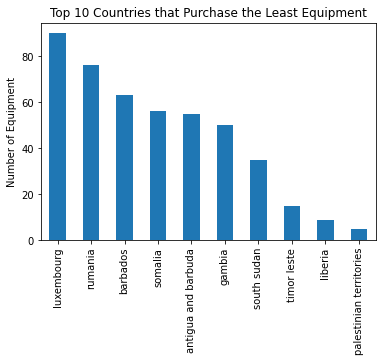

In [21]:
df['country'].value_counts().tail(10).plot(kind='bar')
plt.title('Top 10 Countries that Purchase the Least Equipment')
plt.ylabel('Number of Equipment')
plt

In [17]:
# What is the most popular type of military equipment in the Asia?
print(df[df['continent']=='Asia']['equipment_type'].value_counts())

aircraft                                26020
artillery                               18979
armoured fighting vehicles              15839
helicopters                             12249
patrol and coastal combatants           10134
surface-to-surface missile launchers     5907
air-launched missiles                    4887
principal surface combatants             2898
anti-tank/anti-infrastructure            2564
amphibious                               2060
air defence                              2054
logistics and support                    1978
mine warfare                             1851
submarines                               1193
radars                                    853
unmanned aerial vehicles                  764
ballistic missiles                        416
engineering and maintenance vehicles      284
bombs                                      12
Name: equipment_type, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

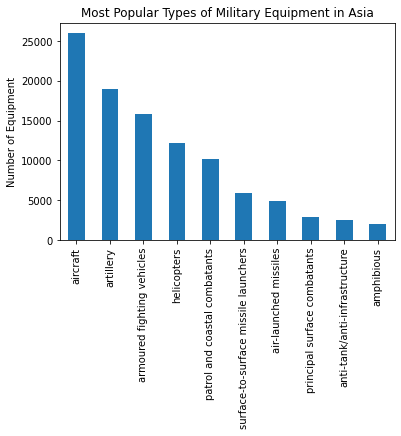

In [34]:
df[df['continent'] == 'Asia']['equipment_type'].value_counts().head(10).plot(kind='bar')
plt.title('Most Popular Types of Military Equipment in Asia')
plt.ylabel('Number of Equipment')
plt

In [18]:
# 4. What is the most popular type of military equipment in Africa?
print(df[df['continent']=='Africa']['equipment_type'].value_counts())

aircraft                                14977
artillery                               11592
armoured fighting vehicles              10955
helicopters                              6306
patrol and coastal combatants            4037
surface-to-surface missile launchers     2327
anti-tank/anti-infrastructure            2269
air-launched missiles                    1564
air defence                               855
amphibious                                790
principal surface combatants              376
logistics and support                     353
mine warfare                              348
radars                                    259
submarines                                169
unmanned aerial vehicles                  148
engineering and maintenance vehicles       55
Name: equipment_type, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

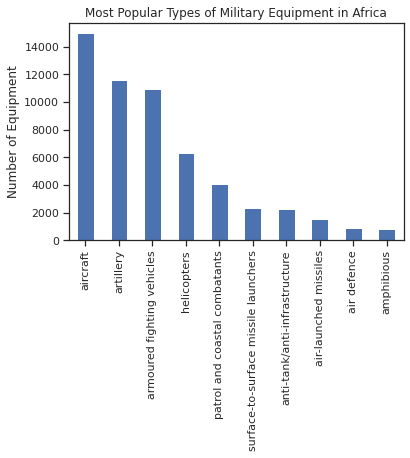

In [71]:
df[df['continent'] == 'Africa']['equipment_type'].value_counts().head(10).plot(kind='bar')
plt.title('Most Popular Types of Military Equipment in Africa')
plt.ylabel('Number of Equipment')
plt

In [65]:
# 4. What is the most popular type of military equipment in Africa?
print(df[df['continent']=='Europe']['equipment_type'].value_counts())

aircraft                                18160
artillery                               11441
armoured fighting vehicles              10978
helicopters                              8514
patrol and coastal combatants            5331
surface-to-surface missile launchers     5066
air-launched missiles                    4157
principal surface combatants             2603
mine warfare                             2322
logistics and support                    2315
submarines                               2226
radars                                   1459
amphibious                               1358
anti-tank/anti-infrastructure            1353
air defence                              1305
unmanned aerial vehicles                  389
engineering and maintenance vehicles      371
ballistic missiles                        351
bombs                                      23
Name: equipment_type, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

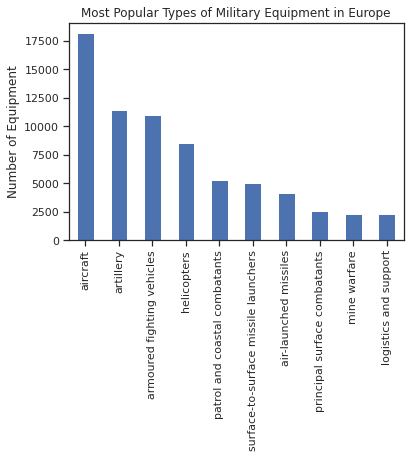

In [70]:
df[df['continent'] == 'Europe']['equipment_type'].value_counts().head(10).plot(kind='bar')
plt.title('Most Popular Types of Military Equipment in Europe')
plt.ylabel('Number of Equipment')
plt

In [68]:
# What is the most popular type of military equipment in the US?
print(df[df['continent']=='Americas']['equipment_type'].value_counts())

aircraft                                26624
helicopters                              9246
artillery                                7065
armoured fighting vehicles               6828
patrol and coastal combatants            5206
air-launched missiles                    2307
logistics and support                    1780
principal surface combatants             1724
anti-tank/anti-infrastructure            1430
surface-to-surface missile launchers     1374
amphibious                               1114
radars                                   1071
submarines                                955
air defence                               684
unmanned aerial vehicles                  373
mine warfare                              257
engineering and maintenance vehicles      138
ballistic missiles                        120
Name: equipment_type, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

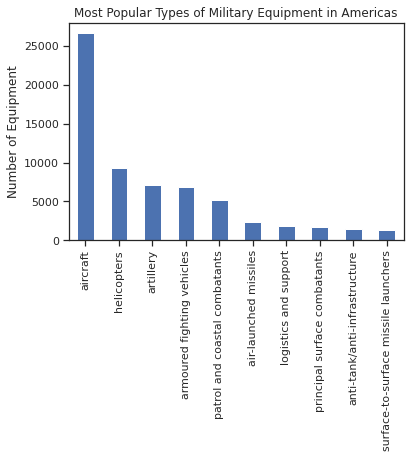

In [69]:
df[df['continent'] == 'Americas']['equipment_type'].value_counts().head(10).plot(kind='bar')
plt.title('Most Popular Types of Military Equipment in Americas')
plt.ylabel('Number of Equipment')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

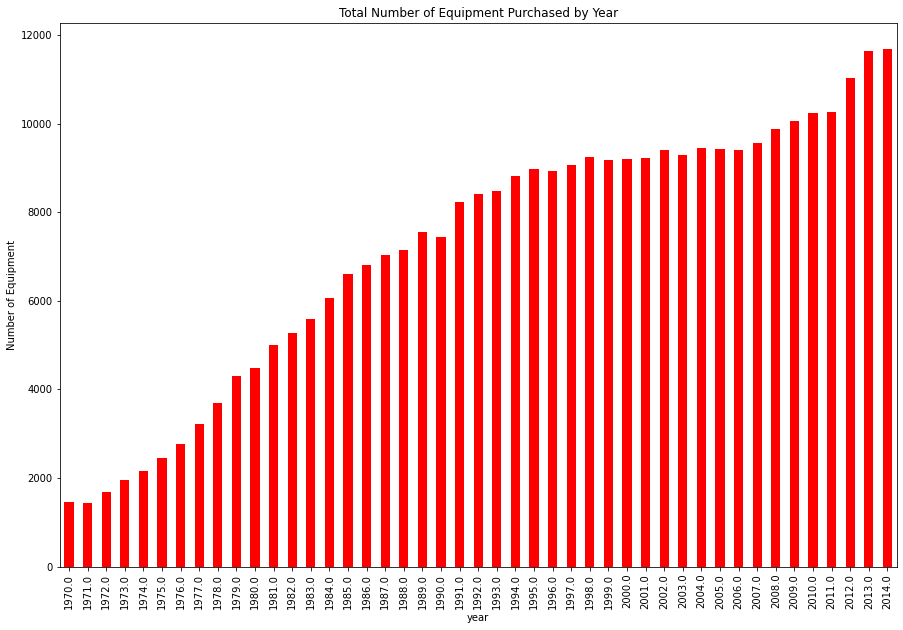

In [61]:
# Has the global purchase of military equipment increased or decreased over time? 
# First, we create a new column that excludes 2015, 2016, and 2017.
df_new_year = df[df['year'] < 2015]
# Next, we group the data by year and sum the total number of equipment each year.
df_new_year.groupby('year')['equipment_type'].count()
# Visualizing the total number of equipment each year
df_new_year.groupby('year')['equipment_type'].count().plot(kind='bar', color='red', figsize=(15,10))
plt.title('Total Number of Equipment Purchased by Year')
plt.ylabel('Number of Equipment')
plt

In [20]:
# How many countries have purchased equipment in the last 10 years?
print(df[df['year']>=2008]['country'].nunique())

171


In [21]:
# What is the most popular type of military equipment in the last 10 years?
print(df[df['year']>=2008]['equipment_type'].value_counts())

aircraft                                16432
artillery                               11186
armoured fighting vehicles              10625
helicopters                              8686
patrol and coastal combatants            7127
surface-to-surface missile launchers     4126
air-launched missiles                    3554
logistics and support                    3430
anti-tank/anti-infrastructure            1736
amphibious                               1544
air defence                              1480
principal surface combatants             1380
radars                                   1283
unmanned aerial vehicles                  939
mine warfare                              891
submarines                                839
engineering and maintenance vehicles      801
ballistic missiles                        221
bombs                                      31
Name: equipment_type, dtype: int64


In [92]:
# How Iran and China have been purchasing equipment in the last 10 years?
df_2018 = df[df['year'] == 2000]
df_2018.head()
df_2018_china = df_2018[df_2018['country'] == 'Americas']
df_2018_china.head()
df_2018_rest = df_2018[df_2018['country'] != 'Americas']
df_2018_rest.head()
df_2018_china['unit_count'].sum()
df_2018_rest['unit_count'].sum()
df_2018_china['unit_count'].sum() / df_2018['unit_count'].sum()
df_2018_rest['unit_count'].sum() / df_2018['unit_count'].sum()
df_2018_china['unit_count'].sum() / df_2018_rest['unit_count'].sum()
df_2018_china['unit_count'].sum() / df_2018_rest['unit_count'].sum() * 100
df_2018_rest['unit_count'].sum() / df_2018_china['unit_count'].sum()
df_2018_rest['unit_count'].sum() / df_2018_china['unit_count'].sum() * 100

inf

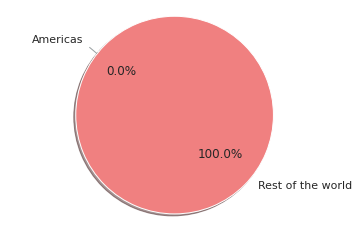

In [90]:
import matplotlib.pyplot as plt

labels = ['Americas', 'Rest of the world']
sizes = [df_2018_china['unit_count'].sum(), df_2018_rest['unit_count'].sum()]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

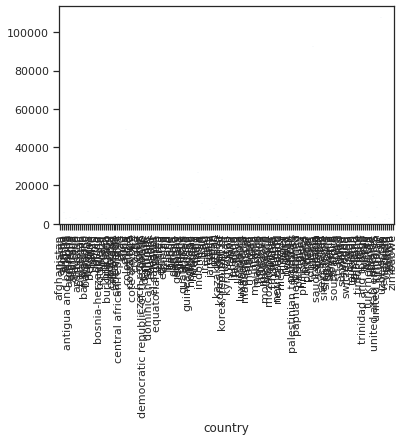

In [84]:
# What is the distribution of the number of units purchased?
df['unit_count'].value_counts()
#  In what year was the most equipment sold?
df['year'].value_counts()
# Compare china, Iran, Russia, us, and France for purchasing equipment in the year of 2010, then visuzlie the results with a bar chart.
df_2010 = df[df['year'] == 2010]
df_2010.head()
df_2010.groupby('country')['unit_count'].sum()
df_2010.groupby('country')['unit_count'].sum().plot(kind='bar')
# Compare china, Iran, Russia, us, and France for purchasing equipment in the year of 2010, then visuzlie the results with a bar chart.
df_2010 = df[df['year'] == 2010]
df_2010.head()
df_2010.groupby('country')['unit_count'].sum()
df_2010.groupby('country')['unit_count'].sum().plot(kind='bar')

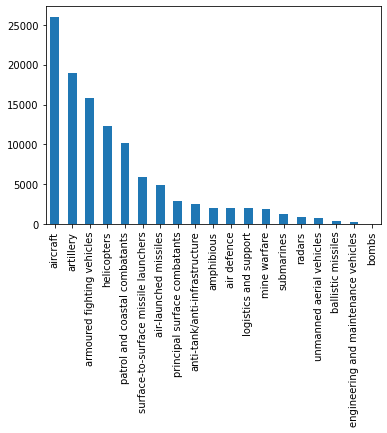

In [25]:
# What is the most popular type of military equipment in the Asia?
df[df['continent']=='Asia']['equipment_type'].value_counts().plot(kind='bar')

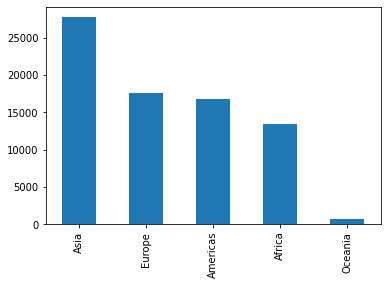

In [27]:
# What is the comparison of the number of continents that purchased equipment in the last 10 years?

df[df['year']>=2008]['continent'].value_counts().plot(kind='bar')

In [29]:
# Create a new dataframe with the top 10 countries that purchase the most equipment
top_10 = df['country'].value_counts().head(10).index
top_10_df = df[df['country'].isin(top_10)]

In [33]:
df['country_count'] = df.groupby('country')['country'].transform('count')
df_country_count = df.groupby(['country', 'country_count']).size().reset_index(name='count')

In [35]:
fig = px.scatter(df_country_count, x='country_count', y='country', size='count', color='country',
           hover_name='country', log_x=True, size_max=60)
fig.update_layout(title='Number of Equipment Types Purchased by Country',
                  xaxis_title='Number of Equipment Types',
                  yaxis_title='Country')
fig.show()

In [43]:
!pip install chart-studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type='choropleth',
            locations = df_country_count['country'],
            locationmode = 'country names',
            z = df_country_count['count'],
            text = df_country_count['country'],
            colorbar = {'title':'Equipment Count'})

layout = dict(title = 'Number of Equipment Purchased by Country',
              geo = dict(showframe = False,
                         projection = {'type': 'mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [36]:
fig = px.scatter(df_country_count, x='country_count', y='country', size='count', color='country',
           hover_name='country', log_x=True, size_max=60)
fig.update_layout(title='Number of Equipment Types Purchased by Country',
                  xaxis_title='Number of Equipment Types',
                  yaxis_title='Country')
fig.update_traces(textposition='top center')
fig.show()

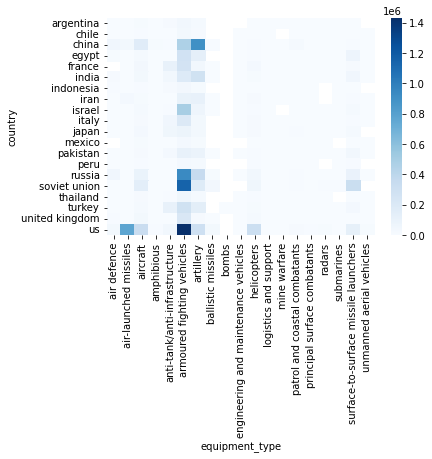

In [69]:
# How does the equipment type vary by country? (top 20 countries that purchase the most equipment.)
# To answer this question, we will use a heatmap.

# First, we will create a pivot table with the country as the rows and the equipment type as the columns.
# The values in the table will be the number of units purchased.

# First, we will select top 20 countries that purchase the most equipment.
top_countries = df['country'].value_counts().head(20).index

# Next, we will create a pivot table with the country names as the index and the equipment types as the columns.
# The values will be the counts of each equipment type.
pivot = df[df['country'].isin(top_countries)].pivot_table(index='country', columns='equipment_type', values='unit_count', aggfunc='sum')
import plotly.graph_objects as go

sns.heatmap(pivot, cmap='Blues')

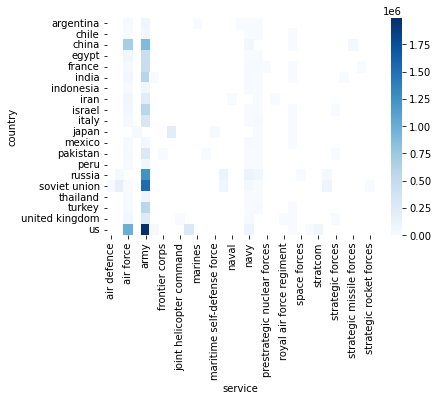

In [70]:
# How does the service nranch vary by country? (top 20 countries that purchase the most equipment.)
pivot = df[df['country'].isin(top_countries)].pivot_table(index='country', columns='service', values='unit_count', aggfunc='sum')
sns.heatmap(pivot, cmap='Blues')

In [74]:
# What is US military capabilities campared to Global average? To answer this question, I will use a bar chart to compare the average number of equipment units purchased by countries in the US compared to the global average.
# 
# First, I will create a new dataframe that contains the average number of equipment units purchased by the US countries.
# Create a new dataframe that contains the average number of equipment units purchased by the US.

us_df = df[df['country']=='United States']
us_df.head()

# Next, to obtain the avarage for the rest of the world, I will create a new dataframe that contains the average number of equipment units purchased by the rest of the world countries.

world_df = df[df['country']!='United States']
world_df.head()
# Calculate the average number of equipment units purchased by the US.

us_mean = us_df['unit_count'].mean()
us_mean


nan

In [72]:
# Visualize the average number of equipment units purchased by the US compared to the global average.

objects = ('United States', 'Global')
y_pos = np.arange(len(objects))
performance = [us_mean, world_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Number of Equipment Units Purchased')
plt.title('Average Number of Equipment Units Purchased by the US compared to Global Average')

plt.show()

AttributeError: ignored

In [11]:
df['aircraft_count'] = df['unit_count'] * df['unit_name'].apply(lambda x: 1 if x == 'aircraft' else 0)
df.head()
df.groupby(['country', 'year'])['aircraft_count'].sum().head()

country      year  
afghanistan  1971.0    0.0
             1972.0    0.0
             1973.0    0.0
             1974.0    0.0
             1975.0    0.0
Name: aircraft_count, dtype: float64

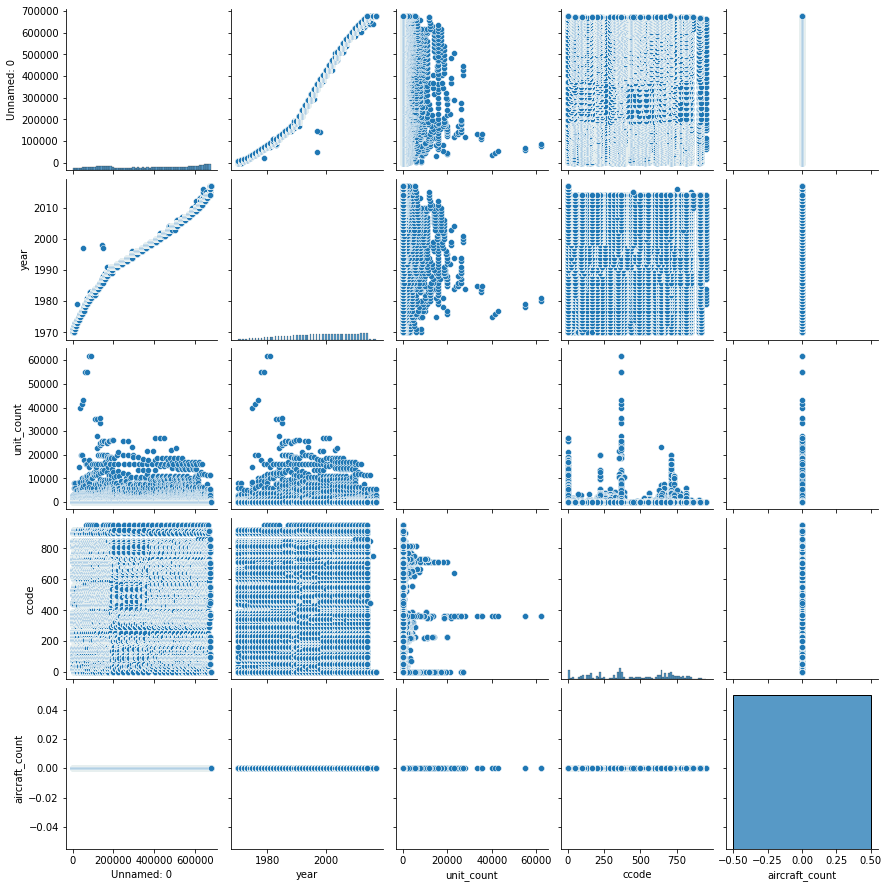

In [17]:
sns.pairplot(df)